# Introducing Stacasso (Notebook)

v.0.0.1

Stacasso is a Python library for visualizing quantum computing circuits.

The main repository resides on [GitHub](https://github.com/JonHub/stacasso).  The documentation (contained in the repository) can also be viewed online

* [Stacasso README](https://jonhub.github.io/stacasso/)

* **[Introducing Stacasso (Notebook)](https://jonhub.github.io/stacasso/code/stacasso_introduction.html)** (this file) (Introduction and Users's Guide, with Examples)

The Stacasso library is used to pretty-print quantum circuits, as well as visualize the resulting quantum computation.  This notebook demonstrates how to use Stacasso, and visualize a several different quantum computation circuits.

Stacasso is an add-on to the google [Cirq](https://quantumai.google/cirq) quantum computing library.  Cirq is used to create and simulate circuits and for additional back-end code.

For more information on using Cirq, see

* [Introduction to Cirq](https://quantumai.google/cirq/tutorials/educators/intro)

* [Cirq basics](https://quantumai.google/cirq/tutorials/basics)

Stacasso is opensource and free, licensed under Apache 2.0.  Note that Stacasso also uses code from Cirq, used here under the terms of their license (also Apace 2.0).

This notebook can be rendered to `.html` with

```bash
jupyter nbconvert --to html --execute stacasso_introduction.ipynb
```

##### Setup and Imports

In [87]:
# check to see if cirq is installed,
# and install with pip if not

try:
    import cirq
    print("imported cirq (already installed)")
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

imported cirq (already installed)


In [88]:
# standard set of includes

import matplotlib.pyplot as plt
import time

import numpy as np
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=6)

%config InlineBackend.figure_formats = ['svg']

#import seaborn
# seaborn.set()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
# import the Stacasso functions
import stacasso as so
import hlf
import tele


### Quantum Random Number Generator

A Hadamard transformation put the bit into an equal superpositon of two states.

Upon measument, it will collapse to one of two states ("quantum coin flip").

This circuit is not useful in itself, but demonstrates the use of the `H` gate to create superposition, one of the building blocks of quantum circuits.


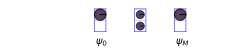

In [124]:
# EXAMPLE - Quantum Random Number Generater 
#           ("Quantum Coin Flip")
# 
#   Place one qubit in a equal superposition,
#   using a Hadamard (H) gate.
#   Measuing the qubit collapses it randomly

# first, make the circuit, using cirq
qrng_circuit = cirq.Circuit()
q0 = cirq.NamedQubit('qubit 0')
qrng_circuit.append(cirq.H(q0))
qrng_circuit.append(cirq.measure(q0))

# labeling the states is optional
labels = ['$\psi_0$', '', '$\psi_M$']

# print and illustrate with Stacasso
so.pprint( rng_circuit, '"Quantum Random Number Generator (QRNG)"' )
so.illustrate( rng_circuit, labels )

plt.savefig( 'qrng_illustration.svg')
#plt.axis(True)


In [102]:
circuit_html = so.highlight(rng_circuit, '"Quantum Random Number Generator (QRNG)"')

In [103]:
print(circuit_html)

<pre><span style="white-space:pre;"><span style="color:Maroon">"Quantum Random Number Generator (QRNG)"</span><br><br>    <span style="background-color:WhiteSmoke;color:Blue">qubit 0</span>: ──────H──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br></style></pre>


### Bell State

Bell States are made from maximially entangling two photons.  It is one of the most fundamental quantum mechanical circuits.

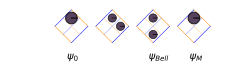

In [111]:
# Bell Example

bell_circuit = so.make_bell_circuit()

# make labels (optional)
labels = ['$\psi_0$',
          '',
          '$\psi_{Bell}$',
          '$\psi_M$']

so.pprint(bell_circuit,"Bell State")
so.illustrate(bell_circuit, labels)

plt.savefig('bell_illustration.svg')

In [113]:
print(so.highlight(bell_circuit,"Bell State"))

<pre><span style="white-space:pre;"><span style="color:Maroon">Bell State</span><br><br>    <span style="background-color:WhiteSmoke;color:Blue">q0</span>: ──────H──────<span style="color:MediumSlateBlue">@</span>──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br>                     │      │<br>    <span style="background-color:WhiteSmoke;color:DarkOrange">q1</span>: ─────────────X──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br></style></pre>


### Quantum Teleportation

[Textbook algorithms in Cirq (Quantum Teleportation)](https://quantumai.google/cirq/tutorials/educators/textbook_algorithms#quantum_teleportation)



In [105]:
# quantum teleportation
import tele

#tele.test()


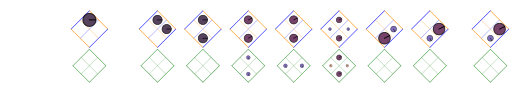

In [122]:
gate = gate = cirq.X ** .3

tele_circuit = tele.make_quantum_teleportation_circuit(gate)

so.pprint(tele_circuit,'"Quantum Teleportation"')
so.illustrate(tele_circuit,offset_ends=True)

plt.savefig('tele_illustration.svg')


In [117]:
print(so.highlight(tele_circuit,'"Quantum Teleportation"'))


<pre><span style="white-space:pre;"><span style="color:Maroon">"Quantum Teleportation"</span><br><br>    <span style="background-color:WhiteSmoke;color:Blue">A (msg)</span>: ────────────────────X^0.3──────<span style="color:MediumSlateBlue">@</span>──────H──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>─────────────<span style="color:MediumSlateBlue">@</span>──────<br>                                            │             │             │<br>    <span style="background-color:WhiteSmoke;color:DarkOrange">B (ali)</span>: ──────H──────<span style="color:MediumSlateBlue">@</span>─────────────────X─────────────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<span style="color:MediumSlateBlue">@</span>──────┼──────<br>                          │                                      │      │<br>    <span style="background-color:WhiteSmoke;color:ForestGreen">M (bob)</span>: ─────────────X───────────────────────────────

### HLF 2D

[Hidden linear function problem](https://quantumai.google/cirq/tutorials/hidden_linear_function)

In [127]:
# Create smaller version of the HLF2D problem (3, 4 and 5 qubits)
#   q is number of qubits,
#   l is min_L_size
#
# Every HLF2D problem has zero as an answer (???),
# and can have additional answers
# interesting versions of the problem have only a few answers

# three qubits
q = 3
l = 4

# four qubits
#q = 4
#l = 5

# five qubits
# q = 5
# l = 12

# ten qubits (number from original google code)
#q = 10
#l = 4

print('Creating an HLF 2D problem instance with')
print('  ', q, 'qubits', '\n  ', l, 'min size of L subspace\n')

problem = None
while problem is None:
    print('finding interesting problem ... ', end='')
    problem = hlf.find_interesting_problem(q, l)
    if problem is None:
        print('(not found)')
    else:
        print('done!')

# the original google code uses 10 qbits

print("Size of subspace L:", len(problem.L))
print("Number of solutions: %d" % len(problem.all_zs))

hlf_circuit = hlf.generate_circuit_for_problem(problem)

#so.pprint_circuit( hlf_circuit, 'HLF 2D' )


Creating an HLF 2D problem instance with
   3 qubits 
   4 min size of L subspace

finding interesting problem ... done!
Size of subspace L: 4
Number of solutions: 2


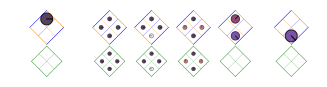

In [128]:
# using stacasso
so.pprint(hlf_circuit,"HLF 2D")
so.illustrate(hlf_circuit,offset_ends=True)
#so.illustrate(hlf_circuit,offset_ends=False)

plt.savefig('hlf2d_illustration.svg')


In [121]:
print(so.highlight(hlf_circuit,"HLF 2D"))


<pre><span style="white-space:pre;"><span style="color:Maroon">HLF 2D</span><br><br>    <span style="background-color:WhiteSmoke;color:Blue">0</span>: ──────H────────────────────H──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br>    <br>    <span style="background-color:WhiteSmoke;color:DarkOrange">1</span>: ──────H────────────────────H──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br>    <br>    <span style="background-color:WhiteSmoke;color:ForestGreen">2</span>: ──────H──────<span style="color:MediumSlateBlue">@</span>──────S──────H──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br>                    │<br>    <span style="background-color:WhiteSmoke;color:DarkRed">3</span>: ──────H──────<span style="color:MediumSlateBlue">@</span>──────S──────H──────<span style="background-color:WhiteSmoke;color:Maroon;fontweight:bold">M</span>──────<br></style></pre

### Visualizing Amplitudes and Probabilites

Creates a `test_state` out of two qubits.  The state is a superposition, each in a different phase, to demonstrate visual represnting probability amplitudes and phases.

One of the contral notions in quantum computation is the notion that you are not computing with classical *probability*, which is a real number between zero and one.  (Classically, an event can be said to occur with a chance between 0 and 100%.)

In quantum theory, the state of a system is described not be classical *probabilies*, but by complex *amplitudes*.  Amplitudes have a *magitude* between zero (no chance) and one (certainty), but additionally have *phase* information, which is discarded in classical probability, but becomes an important tool in quantum computation.

Moreover, the gates in quantum computing operate on these complex amplitudes, rather than probabilities.  

The classical *probability* is the square of the *amplitude*

Amplitudes are described by a *magnitude* between zero and one Like probabilies, amplitudes can have a *magnitude* between zero (no chance) and one (a certainty).

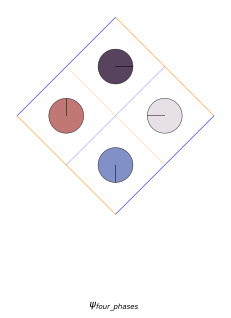

In [36]:
# would be cool to make a circuit to wind up with this state ...

test_state = np.array([1, 1j, -1, -1j])
test_state = so.normalize_state(test_state)

so.draw_statevector4(test_state, label='$\psi_{four\_phases}$' )

#so.pprint_circuit('', 'Two Qubit State Space (Same Probabilty, Different Phases)')

plt.show()
